<a href="https://colab.research.google.com/github/mwendemichelle4-dev/Aviation_Accident_Analysis/blob/main/Aviation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
from google.colab import files

uploaded = files.upload()

Saving Aviation_Data.csv to Aviation_Data (2).csv



View first 5 rows

In [102]:
df = pd.read_csv('Aviation_Data.csv')
df.head()

/tmp/ipython-input-2968550418.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


View last 5 rows


In [103]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [104]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [105]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [106]:
dp.isna().sum()

,0
Event.Id,1459
Investigation.Type,0
Accident.Number,1459
Event.Date,1459
Location,1511
Country,1685
Latitude,55966
Longitude,55975
Airport.Code,40216
Airport.Name,37644


In [107]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 1. Data Cleaning and Preparation

In [108]:
df.drop(['Event.Id','Latitude','Longitude','Aircraft.Category','Schedule','Airport.Code','Airport.Name','Location','Registration.Number','FAR.Description','Air.carrier','Report.Status','Publication.Date','Number.of.Engines'],axis=1,inplace=True)

In [109]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

Since we have inconsistent and incomplete, and it can distort our analysis. So

In [110]:
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,Stinson,108-3,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,Piper,PA24-180,No,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,Cessna,172M,No,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,Rockwell,112,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,Cessna,501,No,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,PIPER,PA-28-151,No,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,CESSNA,210N,No,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


We can create a new columns like Total.Injuries and also Transform the Event.date column into a proper datetime for easy analysis

In [111]:
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

In [112]:
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,Stinson,108-3,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,2.0
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,Piper,PA24-180,No,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,4.0
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,Cessna,172M,No,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,NaN
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,Rockwell,112,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,2.0
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,Cessna,501,No,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,PIPER,PA-28-151,No,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,1.0
90344,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,0.0
90346,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,CESSNA,210N,No,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [113]:
df = (
    df.assign(Event_Date=pd.to_datetime(df['Event.Date']))
      .assign(
          Year=lambda x: x['Event_Date'].dt.year,
          Month=lambda x: x['Event_Date'].dt.month_name(),
          Day=lambda x: x['Event_Date'].dt.day_name()
      )
)

df.head()

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries,Event_Date,Year,Month,Day
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,Stinson,108-3,No,Reciprocating,...,0.0,0.0,0.0,UNK,Cruise,2.0,1948-10-24,1948.0,October,Sunday
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,Piper,PA24-180,No,Reciprocating,...,0.0,0.0,0.0,UNK,Unknown,4.0,1962-07-19,1962.0,July,Thursday
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,Cessna,172M,No,Reciprocating,...,NaN,NaN,NaN,IMC,Cruise,NaN,1974-08-30,1974.0,August,Friday
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,Rockwell,112,No,Reciprocating,...,0.0,0.0,0.0,IMC,Cruise,2.0,1977-06-19,1977.0,June,Sunday
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,Cessna,501,No,NaN,...,2.0,NaN,0.0,VMC,Approach,NaN,1979-08-02,1979.0,August,Thursday


# **Standadize the values**

# 1. Weather.condition column

In [114]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [115]:
# replace 'unk', 'UNK'and fill missing values 'nan' to 'Unknown'
df['Weather.Condition'] = df['Weather.Condition'].str.upper()
df['Weather.Condition'] = df['Weather.Condition'].replace('UNK', 'Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Weather.Condition'].unique()

array(['Unknown', 'IMC', 'VMC'], dtype=object)

# 2. Injury.Severity Column

In [116]:
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [117]:
df['Injury.Severity'] = df['Injury.Severity'].str.strip()

# Extract the word 'Fatal' from values like 'Fatal (4)'

df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'^Fatal.*', 'Fatal', regex=True)

# correct the rest
df['Injury.Severity'] = df['Injury.Severity'].replace({
    'Non-Fatal': 'Non-Fatal',
    'Minor': 'Minor',
    'Serious': 'Serious',
    'Incident': 'Incident',
    'Unavailable': 'Unknown'})
# fill nan with unknown
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')

df['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unknown', 'Minor', 'Serious'],
      dtype=object)

# 3. Investigation.Type Column

In [90]:
df['Investigation.Type'].unique()

array(['Accident', 'Incident', '25-09-2020', '14-06-2021', '03-11-2020',
       '24-02-2021', '02-02-2021', '05-05-2021', '03-12-2020',
       '07-12-2020', '06-05-2021', '19-11-2020', '04-08-2021',
       '13-09-2021', '10-06-2021', '14-12-2021', '08-06-2021',
       '24-06-2021', '24-08-2021', '31-03-2021', '27-05-2021',
       '20-05-2021', '18-11-2020', '25-05-2021', '01-06-2021',
       '15-07-2021', '15-10-2021', '26-09-2020', '03-06-2021',
       '29-09-2021', '28-01-2021', '20-10-2021', '11-12-2020',
       '11-02-2021', '13-12-2021', '06-01-2021', '31-08-2021',
       '04-03-2021', '05-04-2021', '26-01-2021', '29-01-2021',
       '26-08-2021', '08-11-2021', '20-08-2021', '05-01-2021',
       '22-09-2021', '20-09-2021', '16-07-2021', '19-10-2021',
       '16-11-2021', '17-12-2021', '14-06-2022', '22-06-2022',
       '13-10-2022', '03-11-2022', '13-07-2022', '05-07-2022',
       '01-09-2022', '12-08-2022', '08-09-2022', '22-09-2022',
       '01-11-2022', '01-07-2022', '20-07-202

In [118]:

df['Investigation.Type'] = df['Investigation.Type'].where(
    df['Investigation.Type'].isin(['Accident', 'Incident'])
)

#Drop the null values in rows
df = df.dropna(subset=['Investigation.Type'])

df['Investigation.Type'].unique()
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries,Event_Date,Year,Month,Day
0,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,Reciprocating,...,0.0,0.0,0.0,Unknown,Cruise,2.0,1948-10-24,1948.0,October,Sunday
1,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,Reciprocating,...,0.0,0.0,0.0,Unknown,Unknown,4.0,1962-07-19,1962.0,July,Thursday
2,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,Reciprocating,...,NaN,NaN,NaN,IMC,Cruise,NaN,1974-08-30,1974.0,August,Friday
3,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,Rockwell,112,No,Reciprocating,...,0.0,0.0,0.0,IMC,Cruise,2.0,1977-06-19,1977.0,June,Sunday
4,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,Cessna,501,No,NaN,...,2.0,NaN,0.0,VMC,Approach,NaN,1979-08-02,1979.0,August,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,PIPER,PA-28-151,No,NaN,...,1.0,0.0,0.0,Unknown,NaN,1.0,2022-12-26,2022.0,December,Monday
90344,Accident,ERA23LA095,2022-12-26,United States,Unknown,NaN,BELLANCA,7ECA,No,NaN,...,0.0,0.0,0.0,Unknown,NaN,0.0,2022-12-26,2022.0,December,Monday
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,NaN,...,0.0,0.0,1.0,VMC,NaN,0.0,2022-12-26,2022.0,December,Monday
90346,Accident,WPR23LA076,2022-12-26,United States,Unknown,NaN,CESSNA,210N,No,NaN,...,0.0,0.0,0.0,Unknown,NaN,0.0,2022-12-26,2022.0,December,Monday


In [148]:
df['Total.Fatal.Injuries'].fillna(0, inplace = True)
df['Total.Serious.Injuries'].fillna(0, inplace = True)
df['Total.Minor.Injuries'].fillna(0, inplace = True)
df['Total.Uninjured'].fillna(0, inplace = True)
df['Total.Injuries'].fillna(0, inplace = True)
df['Model'].fillna('UNKNOWN',inplace=True)
df['Make'].fillna('UNKNOWN',inplace=True)
df['Country'].fillna('UNKNOWN',inplace=True)
df['Broad.phase.of.flight'].fillna('UNKNOWN',inplace = True)
df['Aircraft.damage'].fillna('UNKNOWN',inplace=True)
df['Engine.Type'].fillna('UNKNOWN',inplace=True)
df['Purpose.of.flight'].fillna('Other Work Use',inplace=True)
df['Amateur.Built'].fillna('No',inplace=True)

/tmp/ipython-input-4107339666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Fatal.Injuries'].fillna(0, inplace = True)
/tmp/ipython-input-4107339666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88883 entries, 6 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88883 non-null  object        
 1   Accident.Number         88883 non-null  object        
 2   Event.Date              88883 non-null  object        
 3   Country                 88883 non-null  object        
 4   Injury.Severity         88883 non-null  object        
 5   Aircraft.damage         88883 non-null  object        
 6   Make                    88883 non-null  object        
 7   Model                   88883 non-null  object        
 8   Amateur.Built           88883 non-null  object        
 9   Engine.Type             88883 non-null  object        
 10  Purpose.of.flight       88883 non-null  object        
 11  Total.Fatal.Injuries    88883 non-null  float64       
 12  Total.Serious.Injuries  88883 non-null  float64    

# **DATA ANALYSIS**




# **Number of Accidents Across The Years (Time Based Analysis)**

# **Accidents Trend by Years**

Some columns have alot of missing values for example Latitude and Longitude. We can drop them and other few columns which are not very useful in our analysis. So we can analyse data from 1980 onwards.

In [150]:
df=df[df['Year']>=1980]

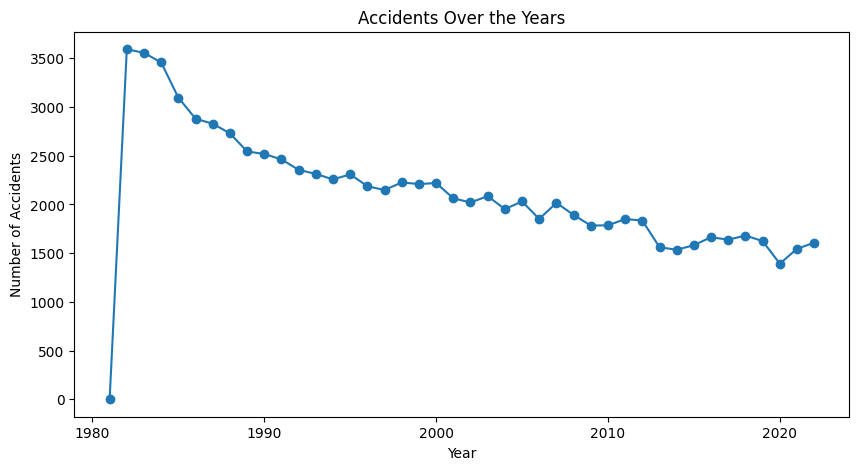

In [138]:
yearly = df.groupby('Year')['Accident.Number'].count()

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Accidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()



# We can see that the Accidents counts are on a downward trend since 1980

# **Accident Trends by Months**

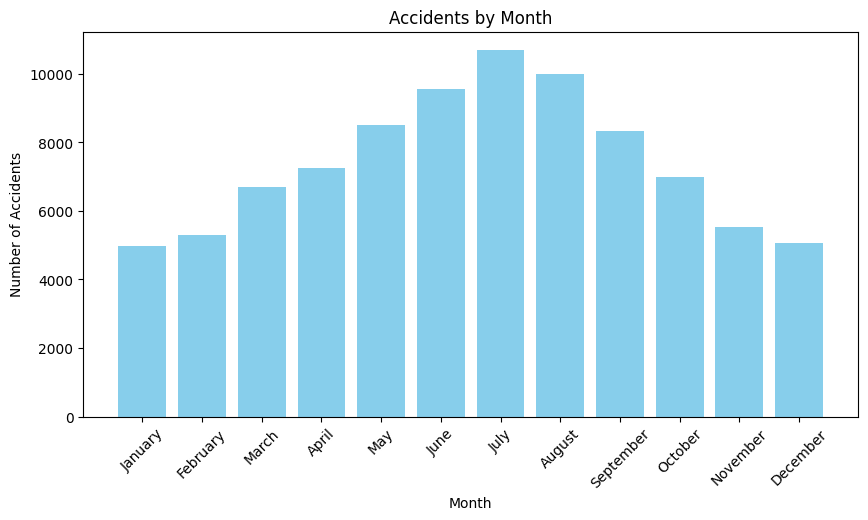

In [151]:
# --- Monthly accidents ---
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly = df.groupby('Month')['Accident.Number'].count().reindex(month_order)

plt.figure(figsize=(10, 5))
plt.bar(monthly.index, monthly.values, color="skyblue")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()



# From the above bar graph we can see that most Accidents happen between the months of June and August.

# **Accident Count by Days**

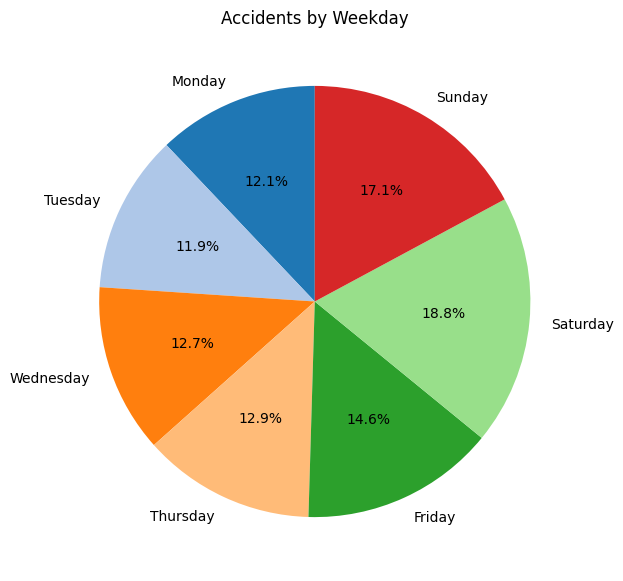

In [152]:
# --- Weekday accidents ---
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

week_day = df.groupby('Day')['Accident.Number'].count().reindex(week_order)

plt.figure(figsize=(7, 7))
plt.pie(
    week_day.values,
    labels=week_day.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.title("Accidents by Weekday")
plt.show()

# Most accidents occur during weekends i.e Sundays and Saturdays

# **Total Injury Count Over The Years (Time Based Analysis)**


Text(0, 0.5, 'Total Injuries')

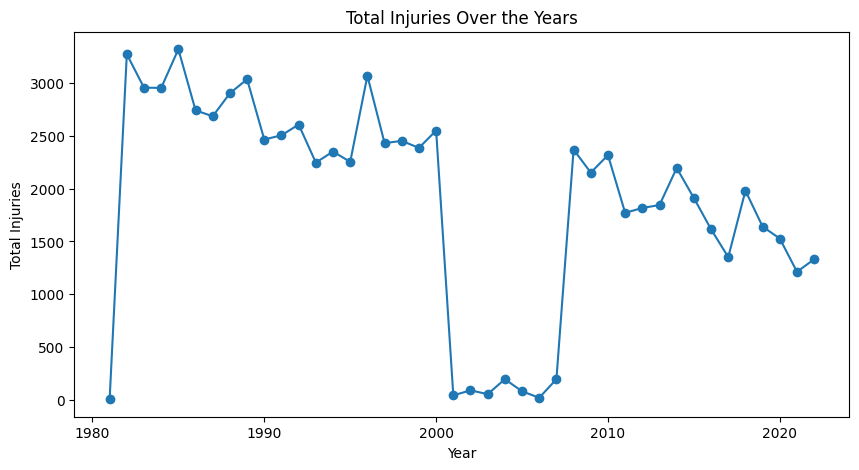

In [153]:
by_year = df.groupby('Year')['Total.Injuries'].sum()
plt.figure(figsize=(10, 5))
plt.plot(by_year.index, by_year.values, marker='o')
plt.title("Total Injuries Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Injuries")

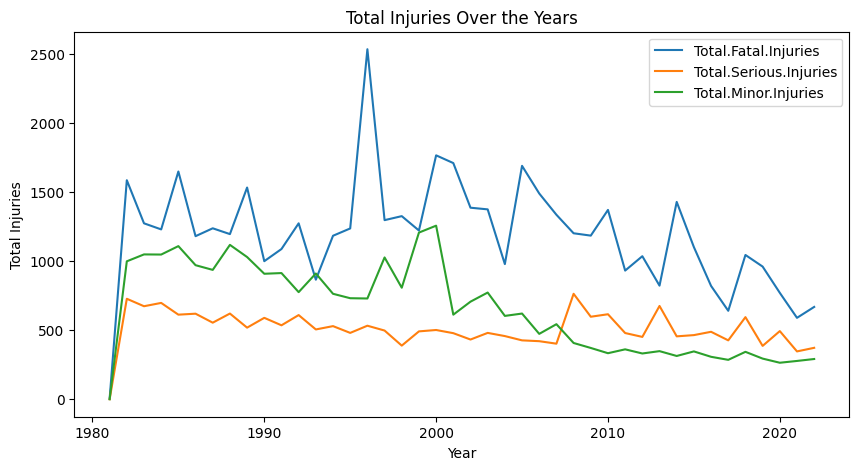

In [154]:
by_year= df.groupby('Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].sum().reset_index()
by_year.set_index('Year').plot(kind='line', figsize=(10, 5))
plt.title("Total Injuries Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Injuries")
plt.show()